In [1]:
%reset -f
import sys
sys.path.insert(0,'..')
from utils import *
from wavhandler import *
import os
import soundfile as sf
import matplotlib.pyplot as plt
from utils import np_hist, butter_highpass_filter

In [37]:
dataset = Dataset('Pcfruit')
dataset.read(data=dataset.target_classes[1], setting='psd_dB')
dataset.clean(threshold=0, threshold_interf=70)
# dataset.get_sensor_features()
dataset.remove_f0_range(low=95, high=105)
raw = dataset.make_array(setting='raw');
specs = dataset.make_array(setting='spectrograms');

Data: D. suzukii.
Read 10493 filenames in 0.10 seconds.
Loaded data into matrix in 2.98 seconds.
566 filenames after cleaning.
494 filenames after removing interference.


In [44]:
plt.figure()
dataset.plot_activity_times()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [43]:
%matplotlib widget

save = False

rdm = np.random.randint(0,raw.shape[0]) #7905 # 1495 # 9063 # 113 #106 # 148final
print(rdm)

point = 0
point2 = -1

sig = raw.iloc[rdm,point:point2].values
sig_series = pd.Series(sig)
filtered = butter_highpass_filter(sig, 180, fs=F_S, order=B_ORDER)

# RAW WAVEFORM
plt.figure(figsize=(20,15))
plt.plot(sig)
plt.ylim(-.15,.15)
if save:
    plt.savefig('/home/kalfasyan/Desktop/a_raw.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

# ZOOMED RAW WAVEFORM
plt.figure(figsize=(20,15))
plt.plot(pd.Series(sig).iloc[1050:1450])
plt.ylim(-.12,.10)
if save:
    plt.savefig('/home/kalfasyan/Desktop/a_zoom.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

psd_dB_series = pd.Series(transform_data(sig))
psd_dB_series.index = np.linspace(0,4096,129)

# PSD_dB 
plt.figure()
psd_dB_series.plot(figsize=(14,10), rot='vertical', grid=False)
if save:
    plt.savefig('/home/kalfasyan/Desktop/a_psd_dB.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

# PSD_high quality
plt.figure()
z = power_spectral_density(data=raw.iloc[rdm,point:point2], noverlap=128+64, nperseg=256, nfft=8128)
psd_series = z.pow_amp.iloc[:800]
psd_series.index = z.frequency.iloc[:800]
psd_series.plot(rot=90, figsize=(14,10), grid=False, xticks=np.arange(0,800,10.))
if save:
    plt.savefig('/home/kalfasyan/Desktop/a_psd_full.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

# SPECTROGRAM
plt.figure(figsize=(10,10))
import librosa
spect = librosa.stft(raw.iloc[rdm,point:point2].values, n_fft = N_FFT, hop_length = HOP_LEN)
spect = librosa.amplitude_to_db(np.abs(spect))
plt.imshow(spect, origin='lower')

if save:
    plt.savefig('/home/kalfasyan/Desktop/a_spec.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

320


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [30]:
plt.figure()
spect = librosa.stft(raw.iloc[rdm,point:point2].values, n_fft = N_FFT, hop_length = HOP_LEN)
spect = np.abs(spect)
plt.imshow(spect, origin='lower')#, extent=[0,128,0,120])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [50]:
plt.close('all')

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

rdm = np.random.randint(0,raw.shape[0])
print(rdm)
x = np.linspace(0,4000,129)
y = dataset.X.iloc[rdm,3000:]
# y = butter_highpass_filter(y, 180, fs=F_S, order=B_ORDER)


fig, ax = plt.subplots(figsize=(30,8))
ax.plot(x,y)
loc = plticker.MultipleLocator(base=50.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.grid(True)
# plt.ylim(-120,-20)
plt.show()

# plt.figure(figsize=(20,4))
# plt.plot(np.arange(0,129,1), )
# plt.xticks()

1843


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

ValueError: x and y must have same first dimension, but have shapes (129,) and (0,)

In [10]:
# rdm = np.random.randint(0,raw.shape[0])
# plt.figure(figsize=(14,4))
# plt.plot(raw.iloc[rdm].values)
# plt.figure(figsize=(18,8))
# plt.imshow(specs.iloc[rdm].values.reshape((129,120)))
# plt.figure(figsize=(18,4))
# dataset.X.iloc[0,:].plot()
# print(rdm)

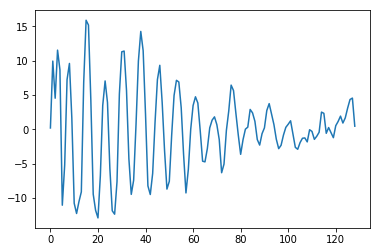

In [72]:
plt.plot(y)

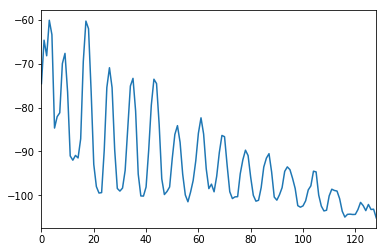

In [3]:
#pd.to_datetime('20190809143432', format='%Y%m%d%H%M%S')

Data: Cichorii.
Read 1451 filenames in 0.07 seconds.
Loaded data into matrix in 0.49 seconds.
753 filenames after cleaning.
/home/kalfasyan/data/insects/Leafminers/Cichorii/D_19_02_06_17_17_55/F190207_142725_124_G_120_T_23.8_H_49.2.wav


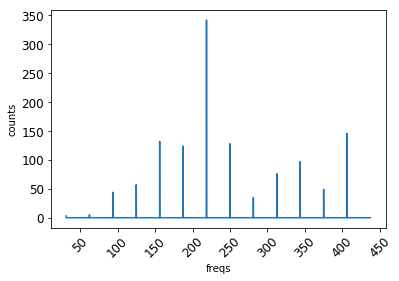

In [4]:
dataset2 = Dataset('Leafminers')#C. pomonella')#D. suzukii')
dataset2.read(data=dataset2.target_classes[0], setting='psd_dB')
dataset2.clean(threshold=10)
print(dataset2.filenames.iloc[0])
dataset2.filenames.apply(lambda x: x.split('/')[6:]).iloc[0]
dataset2.get_sensor_features(version='1')
dataset2.X = make_df_parallel(names=dataset2.filenames, setting='raw')
dataset2.setting = 'raw'
dataset2.get_frequency_peaks(filter_signal=True)

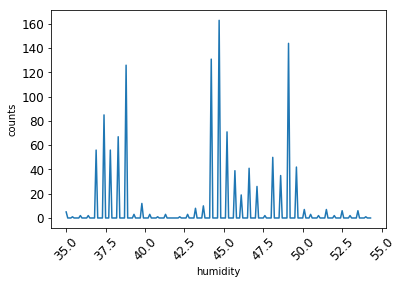

In [23]:
# np_hist(dataset.df_features,'temperature')
np_hist(dataset.df_features.sort_values(by='date'), 'humidity')

In [24]:
sub = dataset.df_features
sub.head(5)

,filenames,wavnames,date,datestr,date_day,date_hour,gain,temperature,humidity
1,/home/kalfasyan/data/insects/plexi_box_wmv/P. ...,F191016_174311_145_G_050_T_27.3_H_49.2,2019-10-16 17:43:11,20191016,16,17,050,27.3,49.2
3,/home/kalfasyan/data/insects/plexi_box_wmv/P. ...,F191016_193138_197_G_050_T_28.0_H_49.2,2019-10-16 19:31:38,20191016,16,19,050,28.0,49.2
4,/home/kalfasyan/data/insects/plexi_box_wmv/P. ...,F191016_191318_178_G_050_T_28.0_H_49.2,2019-10-16 19:13:18,20191016,16,19,050,28.0,49.2
5,/home/kalfasyan/data/insects/plexi_box_wmv/P. ...,F191016_192039_184_G_050_T_28.0_H_49.2,2019-10-16 19:20:39,20191016,16,19,050,28.0,49.2
6,/home/kalfasyan/data/insects/plexi_box_wmv/P. ...,F191016_191959_181_G_050_T_28.0_H_49.2,2019-10-16 19:19:59,20191016,16,19,050,28.0,49.2


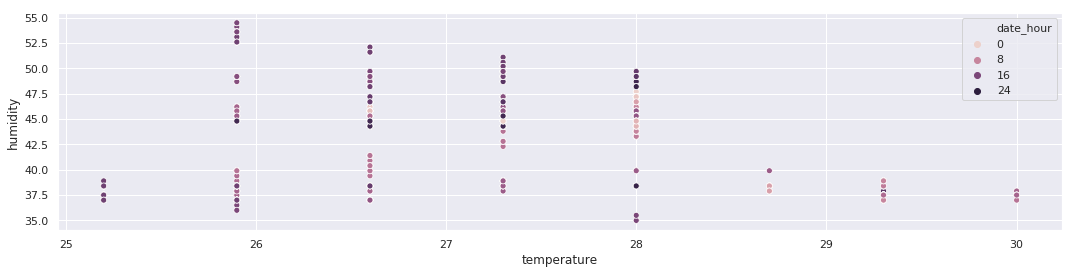

In [43]:
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(18,4)})

X, Y, Z = sub.date_hour, sub.temperature, sub.humidity
sns.scatterplot(x=Y, y=Z, hue=X)

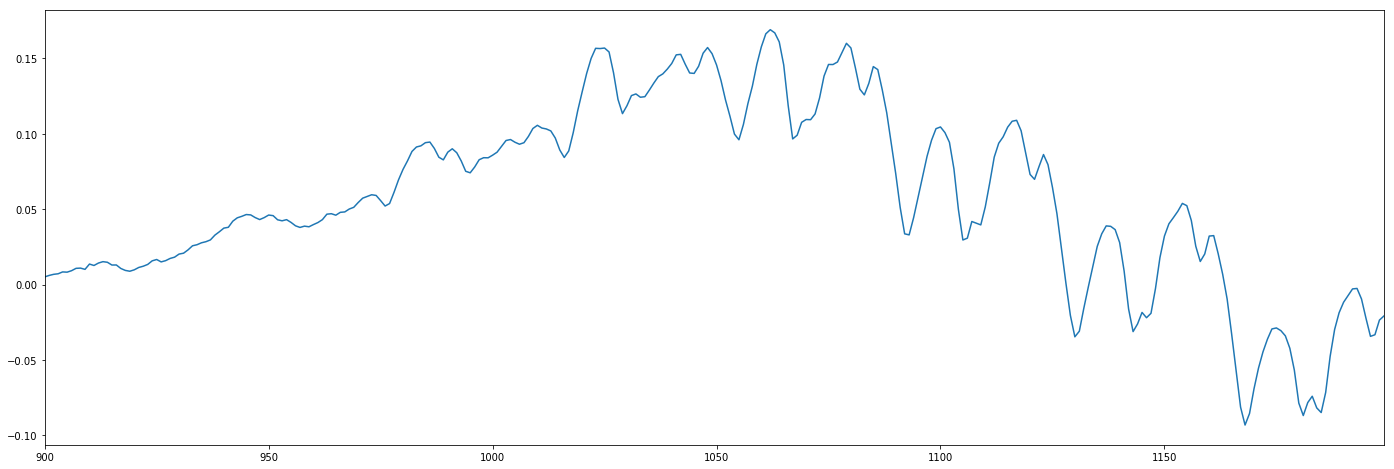

In [5]:
rdm = np.random.randint(0,dataset.X.shape[0])
dataset.X.iloc[rdm,900:1200].plot(figsize=(24,8))

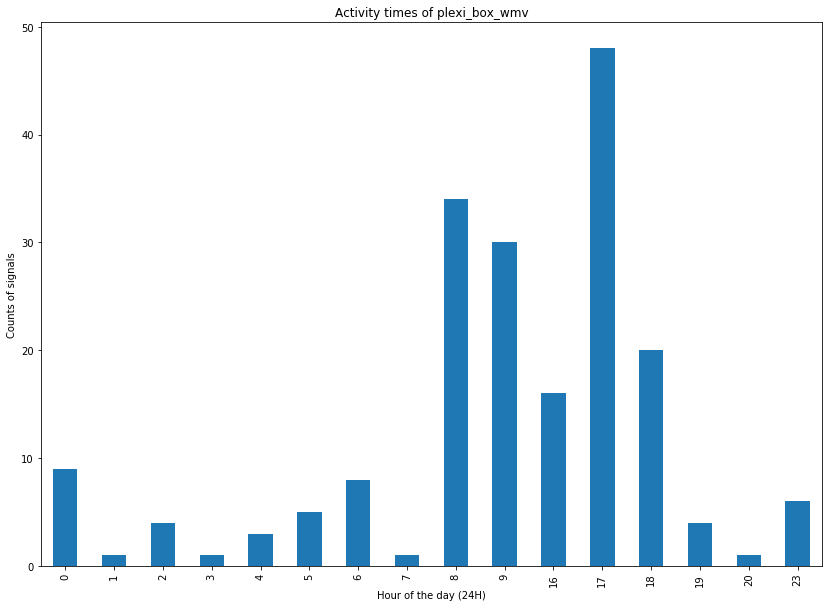

In [13]:
dataset.plot_activity_times()

In [39]:
dataset.read(setting='psd_dB')
# dataset.clean(threshold=10, plot=True)

Data: all.
Read 191 filenames in 0.00 seconds.
Loaded data into matrix in 0.14 seconds.


In [40]:
dataset.filenames.shape

(191,)

In [484]:
# sig = dataset.X.values[np.random.randint(0,321),:]
# # sig = butter_bandpass_filter(sig, L_CUTOFF, H_CUTOFF, F_S, B_ORDER)
# plot_wingbeat(data = sig)
# from scipy.signal import find_peaks
# sigt = transform_data(sig)
# peaks, _ = find_peaks(sigt, height=-99)

# # pd.Series(sigt).plot()
# # plt.plot(peaks, sigt[peaks], 'x')
# print("###############")
# pd.Series(sigt).diff().std()

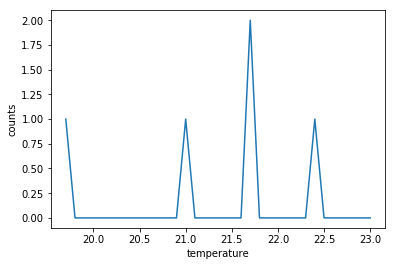

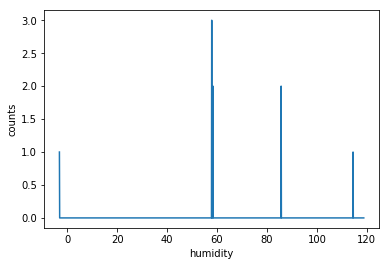

In [485]:
dataset.get_sensor_features(temp_humd=True, hist_temp=True, hist_humd=True)

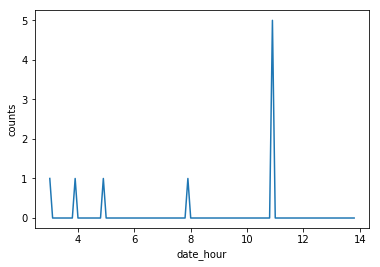

In [486]:
np_hist(dataset.df_features, 'date_hour')

In [487]:
dataset.df_features['month'] = dataset.df_features.date.apply(lambda x: x.month)
df = dataset.df_features
df.head()

,filenames,wavnames,date,date_day,date_hour,gain,temperature,humidity,month
0,/home/kalfasyan/data/insects/with_lamp/D_19_07...,F190710_044739_000_G_050_T_19.7_H_85.8,2019-07-10 04:47:39,10,4,050,19.7,85.8,7
1,/home/kalfasyan/data/insects/with_lamp/D_19_07...,F190710_050852_001_G_050_T_21.8_H_85.8,2019-07-10 05:08:52,10,5,050,21.8,85.8,7
2,/home/kalfasyan/data/insects/with_lamp/D_19_07...,F190713_035533_003_G_050_T_21.8_H_-3.1,2019-07-13 03:55:33,13,3,050,21.8,-3.1,7
3,/home/kalfasyan/data/insects/with_lamp/D_19_07...,F190712_080009_002_G_050_T_21.1_H_119.0,2019-07-12 08:00:09,12,8,050,21.1,119.0,7
4,/home/kalfasyan/data/insects/with_lamp/D_19_07...,F190716_142829_004_G_050_T_22.5_H_114.6,2019-07-16 14:28:29,16,14,050,22.5,114.6,7


In [488]:
dates = []
counts = []
for i, sub in df.groupby(['month','date_day']):
#     print(i,len(sub))
    dates.append("{}-{}-2019".format(str(i[1]).zfill(2),str(i[0]).zfill(2)))
    counts.append(len(sub))

In [489]:
df_hist = pd.DataFrame([counts,dates], index=None).T
df_hist.columns = ['counts','dates']
df_hist.index = df_hist.dates
df_hist.drop('dates', axis=1, inplace=True)
df_hist.head()

,counts
dates,
09-07-2019,5
10-07-2019,2
12-07-2019,1
13-07-2019,1
16-07-2019,1


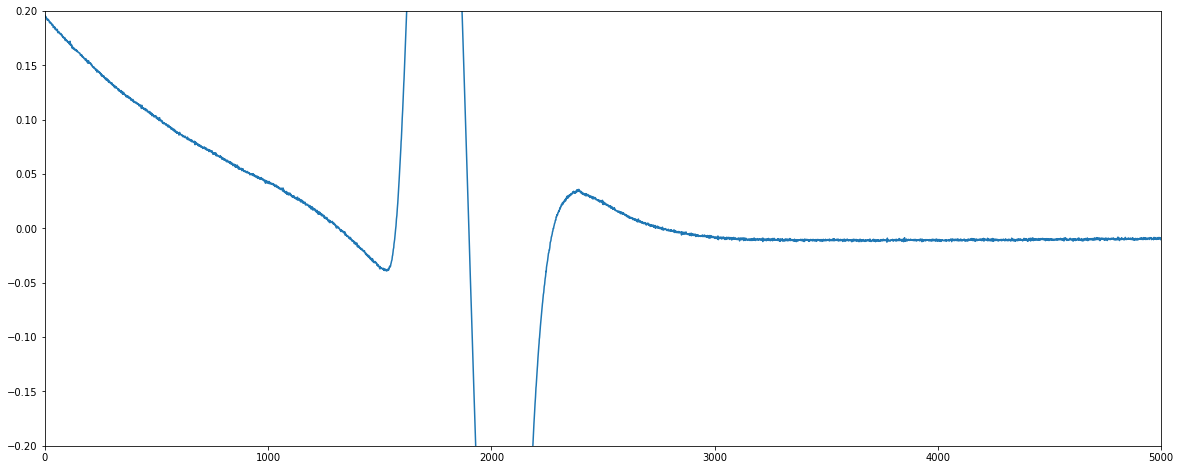

In [528]:
dataset.X.iloc[np.random.randint(0,dataset.X.shape[0]),:].plot(figsize=(20,8), ylim=(-.2,.2))

In [529]:
dataset.X.shape

(10, 5000)

In [532]:
datelist = pd.date_range(start='7/6/2019', end='7/17/2019').strftime('%d-%m-%Y').tolist()
counts = []
for d in datelist:
    if d in df_hist.index.tolist():
        print(d)
        counts.append(df_hist.loc[d].counts)
    else:
        counts.append(0)



09-07-2019
10-07-2019
12-07-2019
13-07-2019
16-07-2019


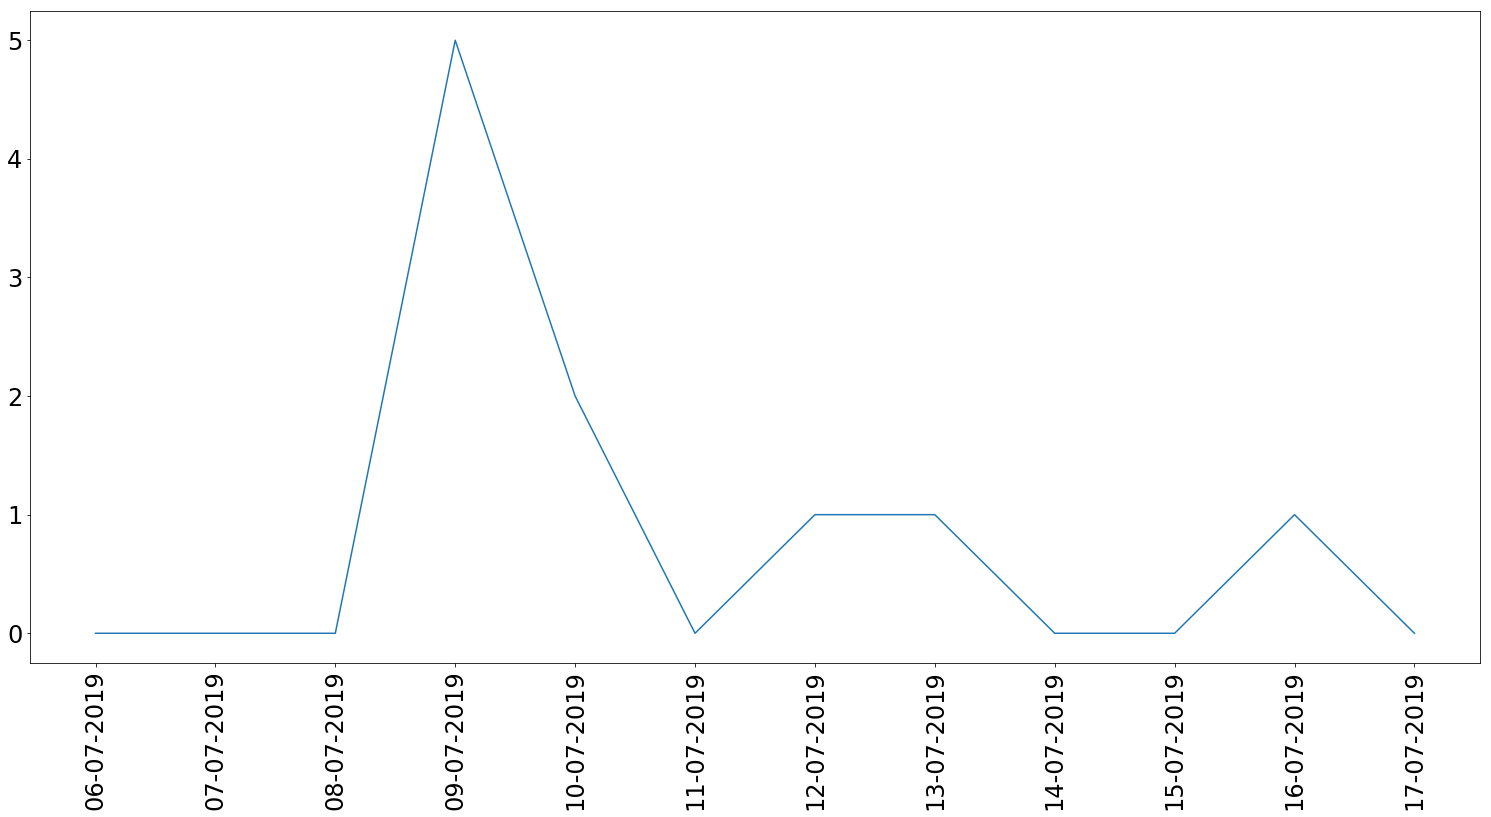

In [534]:
plt.figure(figsize=(26,12))

plt.plot(datelist,counts)

plt.xticks(rotation=90, fontsize=24);
plt.yticks(fontsize=24);